<a href="https://colab.research.google.com/github/EloizioHMD/Python_DS/blob/main/Regress%C3%A3o_Linear_(Mudan%C3%A7as_clim%C3%A1tica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão Linear - Mudanças climática
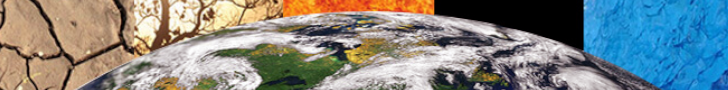

Notebook por [Eloízio Dantas](https://www.linkedin.com/in/eloiziohmdantas/).
Atividade proposta pelo professor [Abner Rodrigues](https://www.linkedin.com/in/abner-rodrigues-9b511018/) na [AWARI](https://www.linkedin.com/school/awari/).


Um dos grandes desafios do nosso tempo, as mudanças climáticas são transformações a longo prazo nos padrões de temperatura e clima. Essas mudanças podem ser naturais, como por meio de variações no ciclo solar. Mas, desde 1800, as atividades humanas têm sido o principal impulsionador das mudanças climáticas, principalmente devido à queima de combustíveis fósseis como carvão, petróleo e gás.

Nesse problemas vamos estudar a relação entre algumas variáveis e a temperatura. O arquivo [climate_change.csv](https://raw.githubusercontent.com/abnr/ml-data/main/climate_change.csv) tem dados climáticos de Maio de 1983 até Dezembro de 2008, com a variáveis:

* Year: o ano da observação.
* Month: o mês da observação.
* Temperature: a diferença em graus Celsius entre a média global de temperatura naquele período e um valor de referência. Dado proveniente da [Climatic Research Unit at the University of East Anglia](https://sites.uea.ac.uk/cru/).
* CO2, N2O, CH4, CFC.11, CFC.12: concentração atmosférica de dióxido de carbono (CO2), óxido nitroso (N2O), metano (CH4), triclorofluormetano (CCl3F, conhecido como CFC-11) e diclorofluormetano (CCl2F2, conhecido como CFC-12). Esses dados foram coletados da  [ESRL/NOAA Global Monitoring Division](http://www.esrl.noaa.gov/gmd/ccgg/data-products.html).
* Aerosols:  a media da profundidade óptica do aerosol estratosférico à 500 nm. Essa variável é ligada com a atividade vulcânica, já que essa atividade lança partículas na atmosfera que afetam o quanto da energia do sol é refletida novamente para o espaço. Esse dado é do [Godard Institute for Space Studies at NASA](http://data.giss.nasa.gov/modelforce/strataer/).
* TSI: o total da irradiãncia solar em W/m2 (a quantidade de energia solar depositada por unidade de área). Devido a manchas solares e outros fenômenos solares, essa quantidade de energia pode variar com o tempo. Dado proveniente do [SOLARIS-HEPPA](http://solarisheppa.geomar.de/solarisheppa/cmip5).
* MEI: multivariate El Nino Southern Oscillation index (MEI), uma medida de força do El Nino/La Nina. Dado do [ESRL/NOAA Physical Sciences Division](https://www.esrl.noaa.gov/psd/).



In [ ]:
# Importação das bibliotecas para atividade de DataScience
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando os dados
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/climate_change.csv')
df.head(5) 

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


Boa parte da atividade de um cientísta de dados consiste na preparação limpeza de dados (data cleaning), que podemos entender como um processo de eliminação de dados inválidos, “sujos” ou pouco informativos, qualificando os dados para melhor resultado possível.

### Explorando os dados para entender necessidade ajustes

In [ ]:
df.info() # função para um ver valores não-nulos e tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [ ]:
df.isnull().sum() # agregação para ver valores não-nulos

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
df.describe() # função para estatística das variáveis numéricas

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


Essa base de dados feito limpa anteriormente, de modo que não existem dados faltantes e as colunas preenchidas.

### **Problema 01**

Nos estamos interessados em saber como alterações nessas variáveis afetam as temperaturas futuras e como essas variáveis explicam as mudanças na temperatura. Para fazer isso, leia o dataset, divida em um dataset para treino usando dados até 2006 (incluso). O dataset de treino é aquele que vai ser usado para encontrar os parâmetros do modelo.

Crie um modelo de regressão para prever Temp usando MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI e Aerosol (Não use ano e mês).

Qual o valor de $R^2$ que você encontrou?

In [ ]:
# Dataset de treino
df_2006 = df.loc[ df['Year'] <= 2006 ]
df_2006.head(5)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [ ]:
x_train = df_2006[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y_train = df_2006['Temp']

In [ ]:
# Regressão Linear pelo Stats model
# https://www.statsmodels.org/stable/regression.html
x_train = sm.add_constant(x_train) # variáveis exogenas.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Statsmodel
modelo = sm.OLS( y_train, x_train)
results = modelo.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.94e-78
Time:                        21:27:58   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.000    -163.744     -85.445
MEI            0.0642      0.006      9.923      0.000       0.051       0.077
CO2            0.0065      0.002      2.826      0.005       0.002       0.011
CH4            0.0001      0.001      0.240      0.810      -0.001       0.001
N2O           -0.0165      0.009     -1.930      0.055      -0.033       0.000
CFC-11        -0.0066      0.002     -4.078      0.000      -0.010      -0.003
CFC-12         0.0038      0.001      3.757      0.000       0.002       0.006
TSI            0.0931      0.015      6.313      0.000       0.064       0.122
Aerosols      -1.5376      0.213     -7.210      0.000      -1.957      -1.118
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.327
Skew:                           0.289   Prob(JB):                      0.00572
Kurtosis:                       3.733   Cond. No.                     8.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O $ R^2 $ foi de 0.751. 

Para melhor compreensão, o $ R^2 $ é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.



### **Problema 02**

Quais variáveis foram significativas?

$p-valor$ ( P>|t| ) é a probabilidade de observar o valor da amostra dado que  $H_0$ é verdadeiro. Geralmente rejeitamos $H_0$ quando o $p-valor$ for menor que um limiar, geralmente igual a 0.05.

Nesse entendimento, as variáveis que forma mais significantes foram: $\beta_0$, MEI, CO2, CFC-11, CFC-12, TSI, Aerosols.

### **Problema 03**
A opinião científica atual é que N20 e CFC-11 são gases de efeito estufa. Entretanto os coeficientes dessas variáveis na regressão deram negativos, indicando que o aumento da concentração desses gases estariam associadas com baixas temperaturas.

Qual a explicação para essa contradição?

Text(0, 0.5, 'N20')

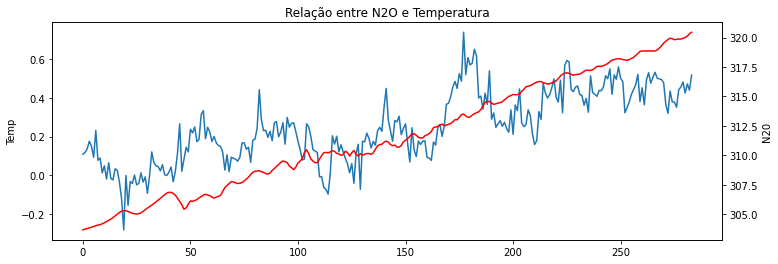

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,4))
plt.title('Relação entre N2O e Temperatura')
ax2 = ax1.twinx()

ax1.plot(df_2006['Temp'], label='Temp')
ax1.set_ylabel('Temp')
ax2.plot(df_2006['N2O'], color='red', label='N20')
ax2.set_ylabel('N20')

Text(0, 0.5, 'CFC-11')

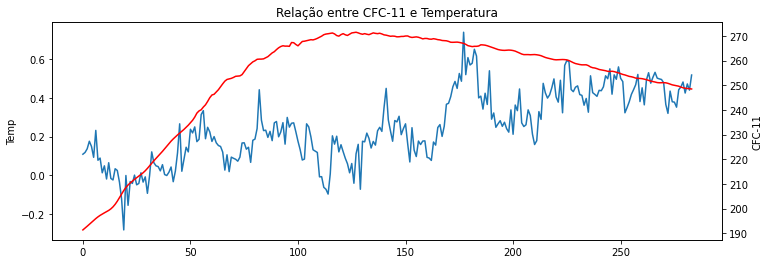

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,4))
plt.title('Relação entre CFC-11 e Temperatura')
ax2 = ax1.twinx()

ax1.plot(df_2006['Temp'], label='Temp')
ax1.set_ylabel('Temp')
ax2.plot(df_2006['CFC-11'], color='red', label='CFC-11')
ax2.set_ylabel('CFC-11')

O $N_2O$ e $CFC-11$ são gases do efeito estufa de fontes antropogênicas que possuem relação com o ozônio atmosférico.

Ralizei um exploração da concentração dos gases relacionando-os com a temperatura. Porém, acho que é preciso uma revisão bibliográfica para entender melhor. Uma possibilidade é que essas variáveis são correlacionadas com outras variáveis de entrada.

### **Problema 04**

Calcule a correlação entre todas as variáveis do conjunto de treinamento.

Quais outras variáveis são muito correlacionadas com N2O (correlação > 0.7) ?
Quais outras variáveis são muito correlacionadas com CFC.11?

Um jeito simples de responder essa questão é plotar um heatmap do dataframe usando uma função do pandas `.corr()`.

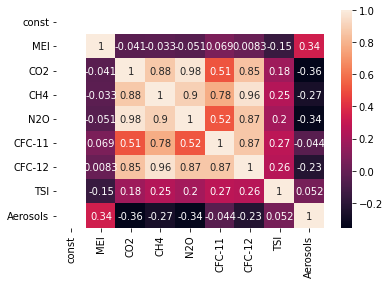

In [ ]:
sns.heatmap( x_train.corr(), annot=True )

### **Problema 5**
Vamos simplificar o modelo e remover as variáveis muito correlacionadas. Crie um modelo com MEI, TSI, Aerosols e N2O.

Qual o coeficiente do N2O nesse novo modelo?
Qual o valor do  $R^2$ ?

In [ ]:
x_train2 = df_2006[['MEI', 'TSI', 'Aerosols', 'N2O']]

In [ ]:
x_train2 = sm.add_constant(x_train2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
modelo2 = sm.OLS( y_train, x_train2 )
results2 = modelo2.fit()

In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.52e-77
Time:                        22:16:12   Log-Likelihood:                 266.64
No. Observations:                 284   AIC:                            -523.3
Df Residuals:                     279   BIC:                            -505.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.2269     20.223     -5.747      0.000    -156.036     -76.418
MEI            0.0642      0.007      9.649      0.000       0.051       0.077
TSI            0.0795      0.015      5.344      0.000       0.050       0.109
Aerosols      -1.7017      0.218     -7.806      0.000      -2.131      -1.273
N2O            0.0253      0.001     19.307      0.000       0.023       0.028
==============================================================================
Omnibus:                       10.908   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.097
Skew:                           0.289   Prob(JB):                     0.000527
Kurtosis:                       3.971   Cond. No.                     5.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""